In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv("C:/Users/peace ikhile/Downloads/neolen-house-price-prediction/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,99900


In [154]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [23]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1259.000000,1259.000000,1259,1041.000000,1259.000000,1259,76,1259,1259,1259,...,1259.000000,4,240,51,1259.000000,1259.000000,1259.000000,1259,1259,1259.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,3,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,995,NaN,NaN,1253,42,794,1134,1258,...,NaN,2,137,47,NaN,NaN,NaN,1087,1024,NaN
mean,630.000000,56.914218,NaN,70.110471,10524.300238,NaN,NaN,NaN,NaN,NaN,...,1.819698,NaN,NaN,NaN,45.944400,6.315330,2007.799841,NaN,NaN,181144.812550
std,363.586303,42.353617,NaN,23.522213,10391.598333,NaN,NaN,NaN,NaN,NaN,...,32.364185,NaN,NaN,NaN,525.688744,2.684202,1.324095,NaN,NaN,80588.024473
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,315.500000,20.000000,NaN,59.000000,7590.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000
50%,630.000000,50.000000,NaN,70.000000,9452.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163500.000000
75%,944.500000,70.000000,NaN,80.000000,11611.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213750.000000


In [24]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
data=data.dropna(axis=1)

In [26]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [27]:
print(data.dtypes)

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 63, dtype: object


In [28]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,6931,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,165400
1255,1256,50,RM,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,11,2007,WD,Normal,127500
1256,1257,20,RL,14303,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,8,2008,WD,Normal,301500
1257,1258,30,RL,4060,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,99900


In [29]:
print(data['EnclosedPorch'].dtypes)

int64


C:\Users\peace ikhile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

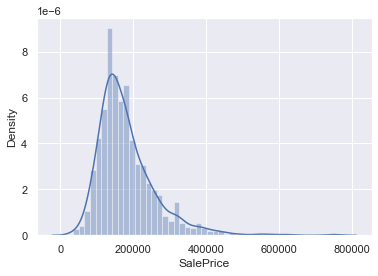

In [30]:
sns.distplot(data['SalePrice'])

In [31]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [32]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1259.000000,1259.000000,1259,1259.000000,1259,1259,1259,1259,1259,1259,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259,1259,1259.000000
unique,NaN,NaN,5,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,995,NaN,1253,794,1134,1258,906,1192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1087,1024,NaN
mean,630.000000,56.914218,NaN,10524.300238,NaN,NaN,NaN,NaN,NaN,NaN,...,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,NaN,NaN,181144.812550
std,363.586303,42.353617,NaN,10391.598333,NaN,NaN,NaN,NaN,NaN,NaN,...,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,NaN,NaN,80588.024473
min,1.000000,20.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,315.500000,20.000000,NaN,7590.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000
50%,630.000000,50.000000,NaN,9452.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163500.000000
75%,944.500000,70.000000,NaN,11611.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,213750.000000


C:\Users\peace ikhile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

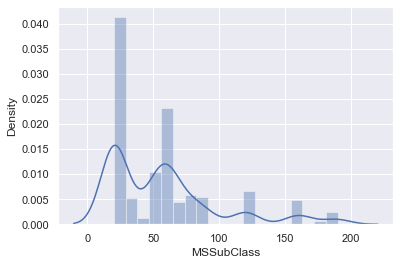

In [33]:
sns.distplot(data['MSSubClass'])

C:\Users\peace ikhile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

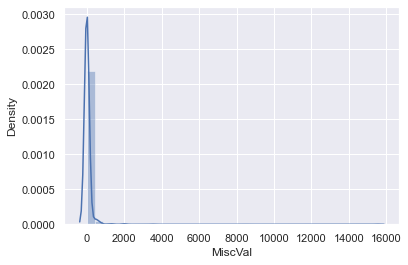

In [34]:
sns.distplot(data['MiscVal'])

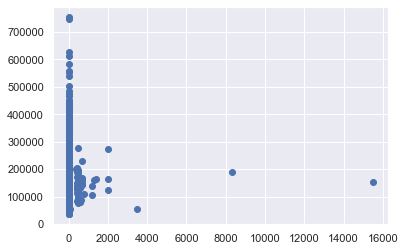

In [35]:
plt.scatter(data['MiscVal'], data['SalePrice'])
plt.show()

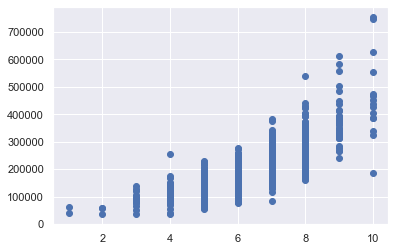

In [36]:
plt.scatter(x='OverallQual',y='SalePrice',data=data)
plt.show()

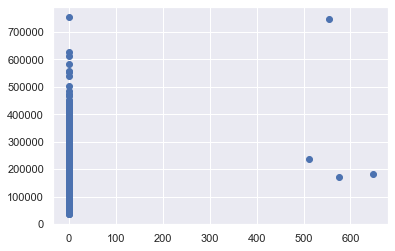

In [78]:
plt.scatter(x='PoolArea',y='SalePrice', data=data)
plt.show()

In [156]:
data['BedroomAbvGr']

0       3
1       3
2       3
3       3
4       4
       ..
1254    3
1255    3
1256    2
1257    2
1258    2
Name: BedroomAbvGr, Length: 1259, dtype: int64

In [157]:
y=data['SalePrice']
x=data[['EnclosedPorch', 'LotArea','PoolArea', 'OpenPorchSF', 'GarageCars','MSSubClass','OverallQual','OverallCond','Fireplaces','ScreenPorch','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']]

In [158]:
x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()

In [159]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     279.0
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:13:13   Log-Likelihood:                -15049.
No. Observations:                1259   AIC:                         3.013e+04
Df Residuals:                    1242   BIC:                         3.022e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.135e+05   8639.223    -13.137      0.000    -1.3e+05   -9.65e+04
EnclosedPorch   -33.9226     18.122     -1.872      0.061     -69.477       1.631
LotArea           0.7100      0.110      6.453      0.000       0.494       0.926
PoolArea        148.2775     33.386      4.441      0.000      82.779     213.776
OpenPorchSF      24.7963     17.585      1.410      0.159      -9.703      59.296
GarageCars       1.4e+04   1945.747      7.194      0.000    1.02e+04    1.78e+04
MSSubClass     -227.1595     26.777     -8.483      0.000    -279.693    -174.626
OverallQual    2.715e+04   1142.540     23.767      0.000    2.49e+04    2.94e+04
OverallCond    1935.1330    997.112      1.941      0.053     -21.077    3891.343
Fireplaces     7613.9354   1939.999      3.925      0.000    3807.898    1.14e+04
ScreenPorch      57.4209     20.230      2.838      0.005      17.732      97.110
BsmtFullBath   2.237e+04   2204.918     10.145      0.000     1.8e+04    2.67e+04
BsmtHalfBath     1.3e+04   4500.506      2.889      0.004    4173.772    2.18e+04
FullBath       1.961e+04   2821.664      6.950      0.000    1.41e+04    2.51e+04
HalfBath       9192.0111   2467.750      3.725      0.000    4350.592     1.4e+04
BedroomAbvGr  -1.427e+04   1913.691     -7.456      0.000    -1.8e+04   -1.05e+04
TotRmsAbvGrd   1.375e+04   1129.797     12.169      0.000    1.15e+04     1.6e+04
==============================================================================
Omnibus:                      570.084   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10347.605
Skew:                           1.635   Prob(JB):                         0.00
Kurtosis:                      16.658   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=4)

In [161]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [162]:
lr.fit(x_train,y_train)

LinearRegression()

In [163]:
lr.intercept_

-119317.6600643094

In [164]:
lr.coef_

array([-5.47944279e+01,  7.63529444e-01,  1.87285279e+02,  1.53707177e+01,
        1.18423549e+04, -2.18062490e+02,  2.86808075e+04,  2.15172773e+03,
        7.54877169e+03,  4.47324127e+01,  2.35480667e+04,  1.26274625e+04,
        2.13788622e+04,  9.89124642e+03, -1.20348130e+04,  1.20519054e+04])

In [165]:
yhat=lr.predict(x_train)

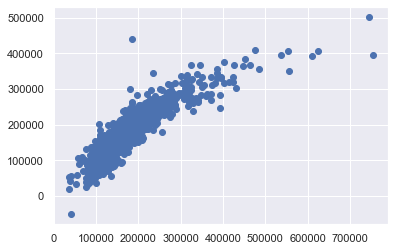

In [166]:
plt.scatter(y_train, yhat)
plt.show()

In [167]:
yhat_test=lr.predict(x_test)

C:\Users\peace ikhile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

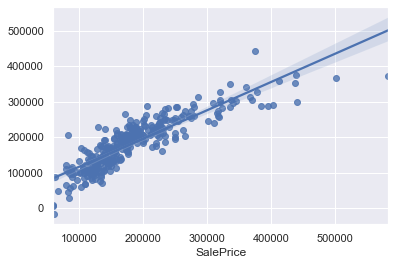

In [168]:
sns.regplot(y_test,yhat_test)

In [171]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2 score:', r2_score(y_test,yhat_test))

r2 score: 0.7725190261863333


In [172]:
print('mean absolute error:', mean_absolute_error(y_test,yhat_test))

mean absolute error: 27277.69883810204


In [173]:
print(mean_squared_error(y_test,yhat_test))

1399429566.4538703
